# Import packages

In [5]:
import pandas
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge as BayesianRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load dataset

In [6]:
df_sleep = pandas.read_csv("data/sleep_data_processed.csv")

In [7]:
df_sleep

,Age,Gender,SleepHour,WorkingAdditionalHour,Stressed
0,0,0,2,1,2
1,0,1,2,2,3
2,0,1,2,1,3
3,0,0,1,2,3
4,0,0,1,1,3
...,...,...,...,...,...
388,1,1,1,1,3
389,0,1,1,0,3
390,0,1,1,1,3
391,0,1,4,2,2


# Generate Weighted Value

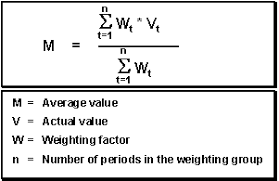

# Average feature importance as a weight of parameter

In [9]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

def getFeatureImportanceXG(df):
    le = LabelEncoder()
    xgb_model = XGBClassifier(random_state=0)
    cols = ['Age','Gender','SleepHour','WorkingAdditionalHour']
    df1 = df[cols]
    y = df['Stressed']
    y = le.fit_transform(y)
    xgb_model.fit(df1,y)
    print("Feature Importance : ",xgb_model.feature_importances_ )

In [10]:
getFeatureImportanceXG(df_sleep)

Feature Importance :  [0.23838441 0.2355854  0.3068501  0.21918006]


| Feature | Weight |
| --- | --- |
| completedIssuesCount | 0.25 |
| issuesNotCompletedInCurrentSprint | 0.14 |
| puntedIssues | 0.17 |
| issuesCompletedInAnotherSprint | 0.27 |
| issueKeysAddedDuringSprint | 0.17 |


## Check Corellations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
def checkCorellations(df):
    cols = cols = ['Age','Gender','SleepHour','WorkingAdditionalHour','Stressed']
    newdf = df[cols]
    sns.pairplot(newdf,kind="scatter",plot_kws=dict(s=80,edgecolor="white",linewidth=2.5))
    plt.show()
    

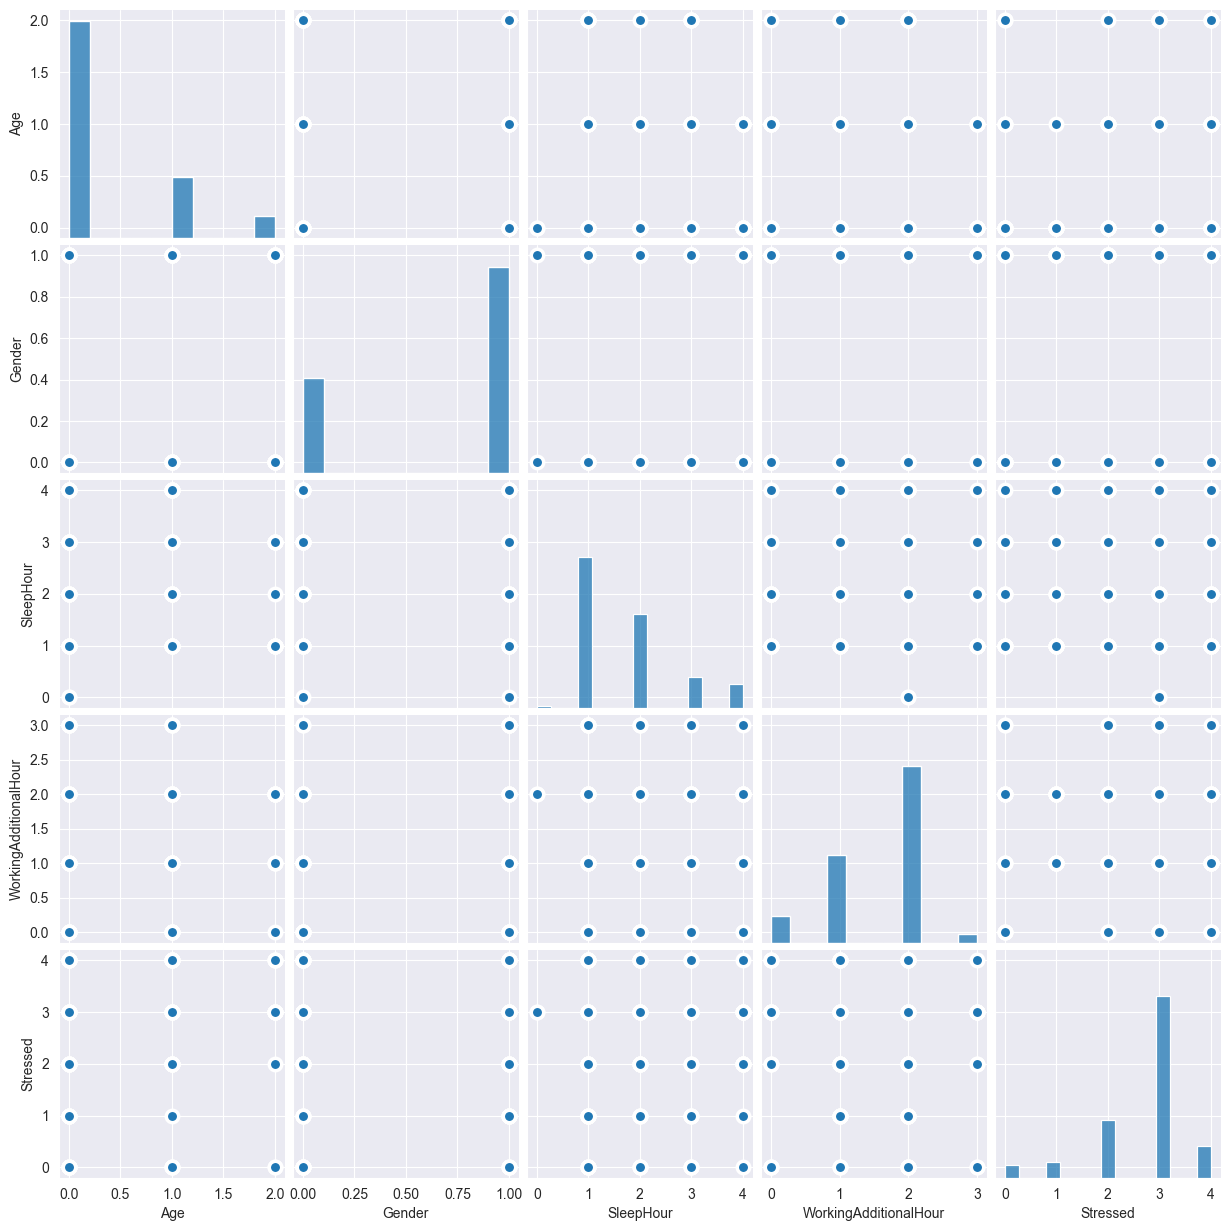

In [13]:
checkCorellations(df_sleep)

# Model Creation

In [14]:
data = pandas.read_csv("data/sleep_data_processed.csv")
# Separate features and target variable
X = data.drop(columns=['Stressed'])
y = data['Stressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
model_filename = 'stress_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# print("Predicted Stress Level:", predicted_stress_level)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.6399466007699278
R-squared: -0.027239386678271638


In [15]:
# Load the model from the file
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Input values for prediction
new_input = pandas.DataFrame({
    'Age':[0],
    'Gender': [0],
    'SleepHour': [2],
    'WorkingAdditionalHour': [1]
})

# Make predictions using the loaded model
predicted_stress_level = loaded_model.predict(new_input)

In [16]:
predicted_stress_level

array([2.58147408])

In [17]:
predicted_stress_level[0]

2.5814740796841966

In [18]:
round(predicted_stress_level[0],0)

3.0